## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [54]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

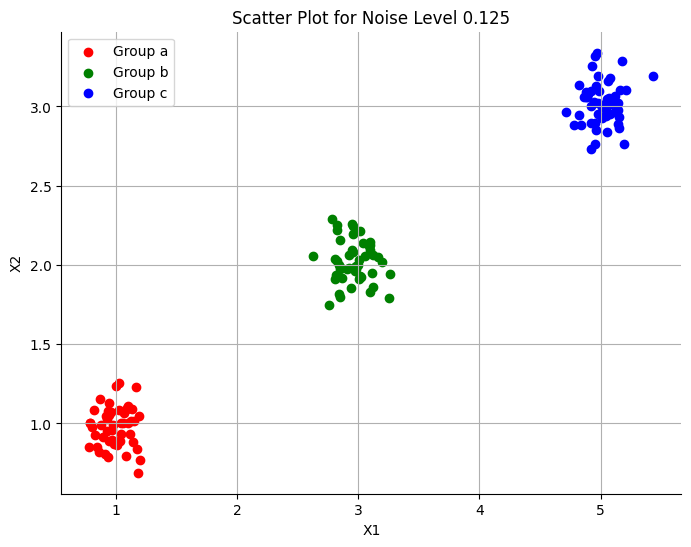

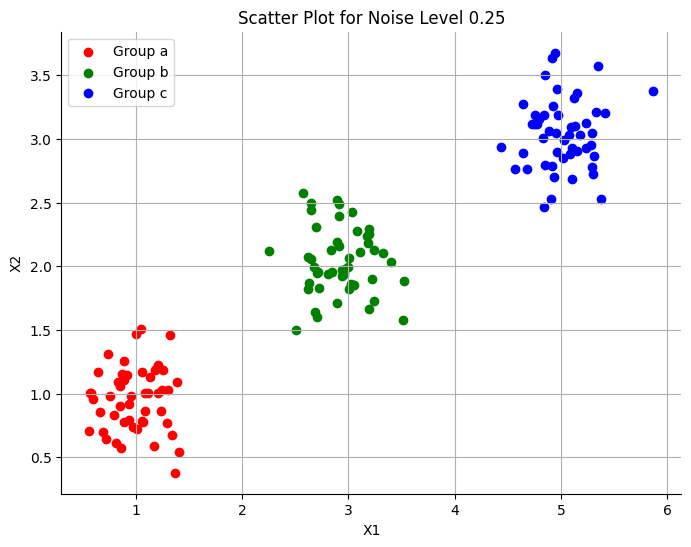

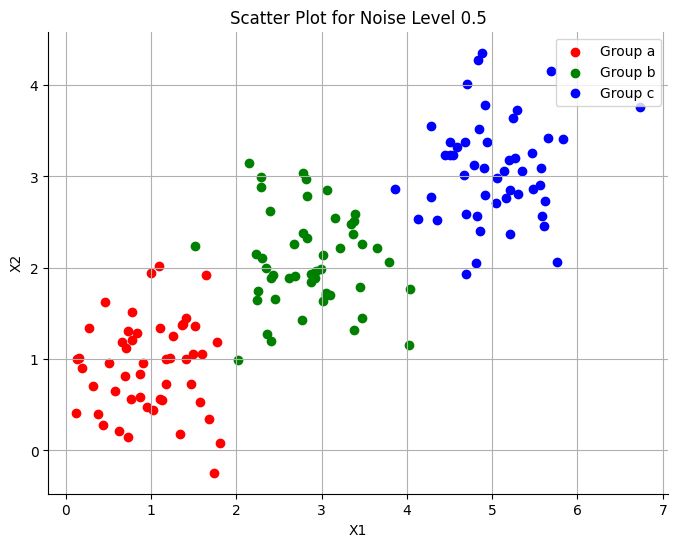

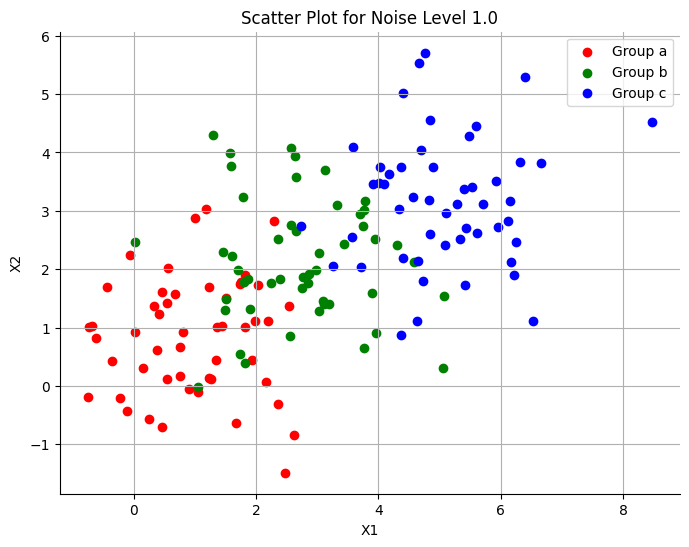

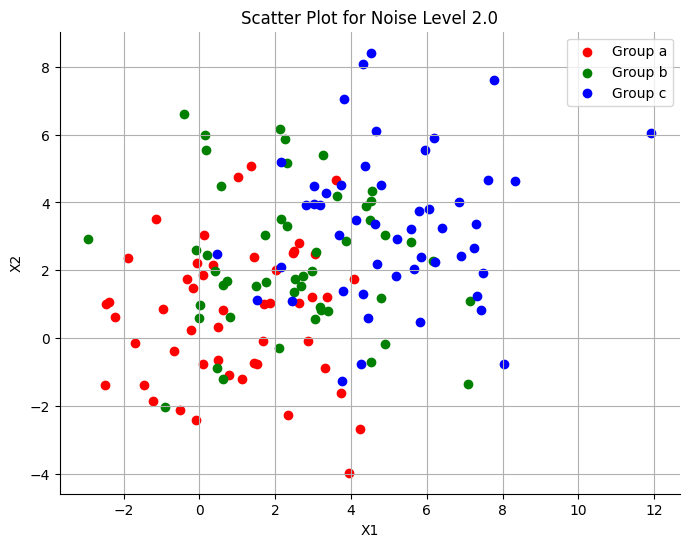

In [ ]:
def plot_scatter(df, noise_level):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[df['group'] == 'a']['x1'], df[df['group'] == 'a']['x2'], label='Group a', color='red')
    plt.scatter(df[df['group'] == 'b']['x1'], df[df['group'] == 'b']['x2'], label='Group b', color='green')
    plt.scatter(df[df['group'] == 'c']['x1'], df[df['group'] == 'c']['x2'], label='Group c', color='blue')
    
    plt.title(f"Scatter Plot for Noise Level {noise_level}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True)
    plt.show()

for noise_level, df in zip([0.125, 0.25, 0.5, 1.0, 2.0], [df0_125, df0_25, df0_5, df1_0, df2_0]):
    plot_scatter(df, noise_level)


As the noise goes up, the distinctness of the clusters goes down.

In [23]:
print(df0_125.dtypes)

x1    float64
x2    float64
dtype: object


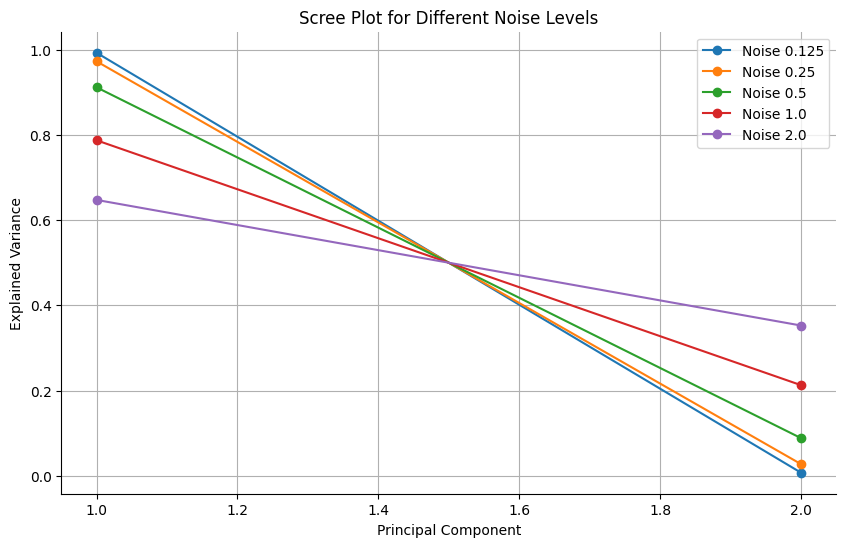

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_all_scree(datasets):
    plt.figure(figsize=(10, 6)) 

    #Loop through all datasets
    for noise_level, df in datasets.items():
        #Standardize the data
        scaler = StandardScaler()
        df_numeric = df.drop(columns=['group']) 
        df_numeric_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=['x1', 'x2'])

        pca = PCA()
        pca.fit(df_numeric_standardized)
        
        #Explained variance ratio (scree plot values) (think eigen values)
        explained_variance = pca.explained_variance_ratio_
        
        #Explain variance for noise levels 
        plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label=f'Noise {noise_level}')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance")
    plt.title("Scree Plot for Different Noise Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

#Dictionary
datasets = {
    0.125: df0_125,
    0.25: df0_25,
    0.5: df0_5,
    1.0: df1_0,
    2.0: df2_0,
}

plot_all_scree(datasets)


Although there are only 2 principal components, so a clear elbow does not emerge, this graph shows that as noise increases, it will be harder to identify a clear elbow (the change in the explained variance from pc1 to pc2 for the purple line is the smallest and so a change in slope is going to be harder to pick up on). This is because when noise increases, the variance gets more distributed across all pcs rather than primarily among the first two.

The intuition of the elbow is to use it to determine how many principal components should be used for optimal principal component analysis. Using the principal components that explain the most variance in the dataset is what should be done. For example, if principal component 1 explains essentially all of the variance in the dataset (its explained variance is close to 1), so pc2 could be dropped. The elbow appears when the curve flattens, and this means that a significant amount of variance is not explained after this principal component. 

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [35]:
data = pd.read_csv('electioncycle.csv')

In [53]:
data['Member'].value_counts()

Member
Abigail Spanberger    1
Maxine Waters         1
Mike Bost             1
Michelle Steel        1
Michelle Fischbach    1
                     ..
Frank Pallone Jr.     1
Frank Mrvan           1
Frank Lucas           1
Eric Swalwell         1
Zoe Lofgren           1
Name: count, Length: 537, dtype: int64

In [36]:
data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [71]:
data['Party'].value_counts()

Party
Democratic     274
Republican     261
Independent      2
Name: count, dtype: int64

In [39]:
data['Spent'].value_counts()

Spent
$0             4
$7,449,678     1
$703,942       1
$2,881,729     1
$13,713,611    1
              ..
$1,594,630     1
$1,424,753     1
$2,979,716     1
$914,101       1
$2,103,190     1
Name: count, Length: 534, dtype: int64

In [38]:
data['Debts'].value_counts()

Debts
$0          404
$250,000      4
$50,000       2
$5,000        2
$170,000      2
           ... 
$20,574       1
$139,110      1
$40,631       1
$15,250       1
$49,480       1
Name: count, Length: 128, dtype: int64

In [58]:
def clean_money_column(col):
    return col.replace({'\$': '', ',': ''}, regex=True).astype(float)

data['Raised'] = clean_money_column(data['Raised'])
data['Spent'] = clean_money_column(data['Spent'])
data['Cash on Hand'] = clean_money_column(data['Cash on Hand'])
data['Debts'] = clean_money_column(data['Debts'])

print(data[['Raised', 'Spent', 'Cash on Hand', 'Debts']].head())
print(data[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe())


       Raised       Spent  Cash on Hand  Debts
0   7719396.0   7449678.0      851851.0    0.0
1   2192741.0   1243502.0     2472888.0    0.0
2  20993041.0  13957854.0    20942888.0    0.0
3   1211111.0   1173466.0      623472.0    0.0
4   1617611.0   1664674.0     1098579.0    0.0
             Raised         Spent  Cash on Hand         Debts
count  5.370000e+02  5.370000e+02  5.370000e+02  5.370000e+02
mean   3.592287e+06  2.875221e+06  1.790359e+06  1.268609e+05
std    7.376927e+06  6.332135e+06  2.804002e+06  8.426411e+05
min   -1.386356e+06  0.000000e+00 -6.478100e+04  0.000000e+00
25%    9.632370e+05  7.325080e+05  4.148470e+05  0.000000e+00
50%    1.731244e+06  1.239741e+06  9.592380e+05  0.000000e+00
75%    3.360517e+06  2.505998e+06  1.924564e+06  0.000000e+00
max    8.658147e+07  7.595981e+07  2.276298e+07  1.330200e+07


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_26136/2287907297.py:2: SyntaxWarning: invalid escape sequence '\$'
  return col.replace({'\$': '', ',': ''}, regex=True).astype(float)


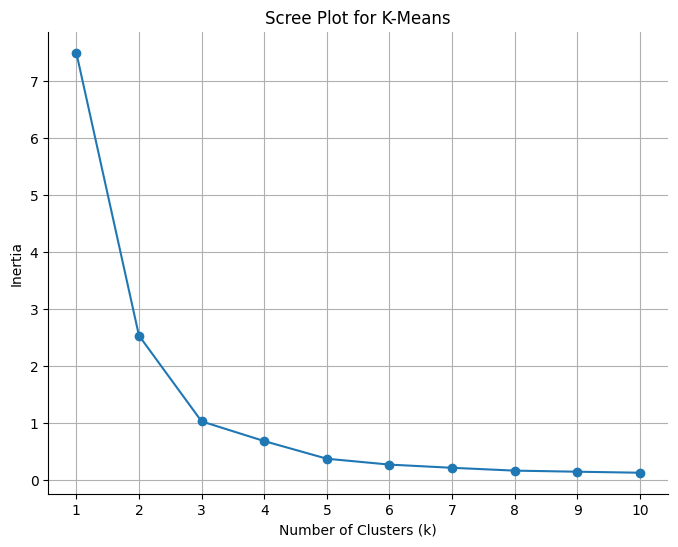

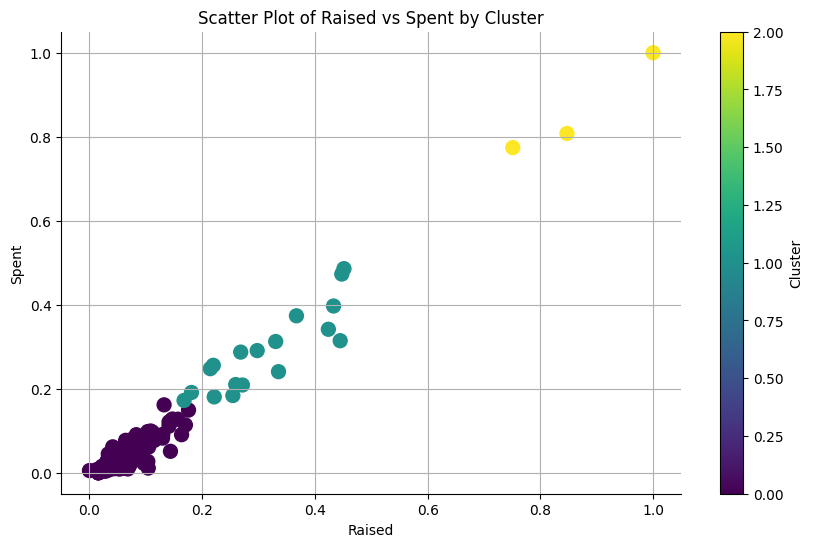

Smallest two clusters: Cluster
2     3
1    18
Name: count, dtype: int64
Politicians in the smallest two clusters: 2                 Adam Schiff
87     Catherine Cortez Masto
89              Chuck Schumer
115              Dan Crenshaw
261              John Kennedy
290              Katie Porter
298            Kevin McCarthy
326             Maggie Hassan
328               Marco Rubio
340                Mark Kelly
357            Michael Bennet
390              Nancy Pelosi
402              Patty Murray
414                 Rand Paul
417           Raphael Warnock
442               Ron Johnson
476             Steve Scalise
490                  Ted Cruz
499                  Tim Ryan
500                 Tim Scott
523               Val Demings
Name: Member, dtype: object


In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Max Min normalize
data['Raised_normalized'] = (data['Raised'].max() - data['Raised']) / (data['Raised'].max() - data['Raised'].min())
data['Spent_normalized'] = (data['Spent'].max() - data['Spent']) / (data['Spent'].max() - data['Spent'].min())

X = data[['Raised_normalized', 'Spent_normalized']]

#Finding optimal k
inertia = []  
for k in range(1, 11):  #k values 1 - 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Scree plot (Elbow method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#k = 3 is optimal based on scree plot
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X)

#Scatter plot of 'Raised' vs 'Spent' with hue by cluster membership
plt.figure(figsize=(10, 6))
plt.scatter(data['Raised'], data['Spent'], c=data['Cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Raised vs Spent by Cluster')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#Smallest two clusters by size (least membership)
cluster_sizes = data['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2)
print('Smallest two clusters:', smallest_clusters)

#Politicians
smallest_cluster_ids = smallest_clusters.index
smallest_cluster_politicians = data[data['Cluster'].isin(smallest_cluster_ids)]
print("Politicians in the smallest two clusters:", smallest_cluster_politicians['Member'])


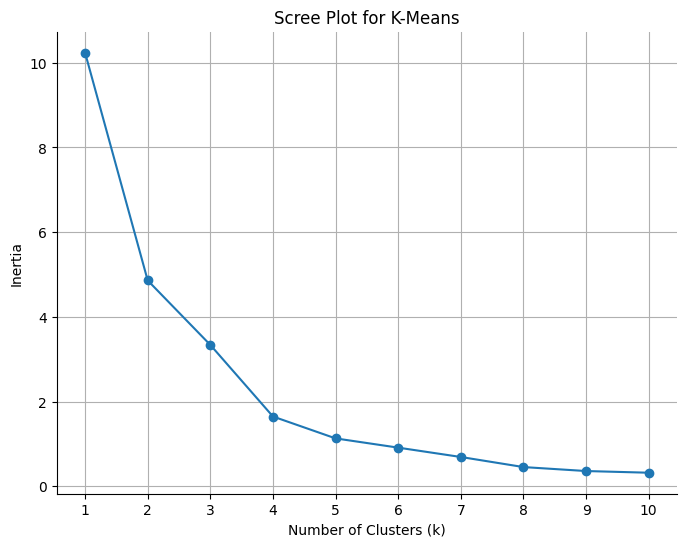

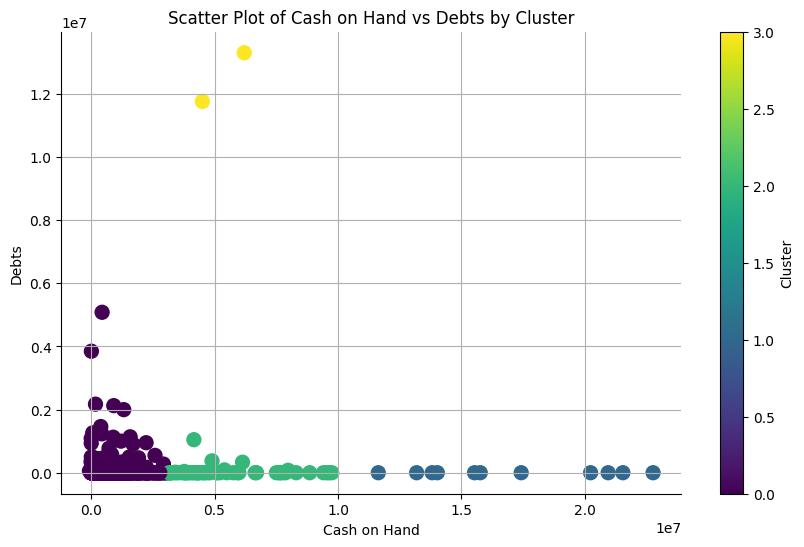

Smallest two clusters:
Cluster
3     2
1    11
Name: count, dtype: int64
Politicians in the smallest two clusters: 2              Adam Schiff
89           Chuck Schumer
133            David Trone
261           John Kennedy
267             John Thune
274        Josh Gottheimer
290           Katie Porter
310         Lindsey Graham
340             Mark Kelly
412    Raja Krishnamoorthi
417        Raphael Warnock
442            Ron Johnson
500              Tim Scott
Name: Member, dtype: object


In [66]:
#max min normalize
data['Cash_on_Hand_normalized'] = (data['Cash on Hand'].max() - data['Cash on Hand']) / (data['Cash on Hand'].max() - data['Cash on Hand'].min())
data['Debts_normalized'] = (data['Debts'].max() - data['Debts']) / (data['Debts'].max() - data['Debts'].min())


X = data[['Cash_on_Hand_normalized', 'Debts_normalized']]

#Optimal number of clusters using a scree plot (Elbow Method)
inertia = []  
for k in range(1, 11):  #k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Scree plot (Elbow method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#k =4 is optimal value
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X)

#Scatter plot of 'Cash on Hand' vs 'Debts' with hue by cluster membership
plt.figure(figsize=(10, 6))
plt.scatter(data['Cash on Hand'], data['Debts'], c=data['Cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Cash on Hand vs Debts by Cluster')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#Smallest two clusters by size
cluster_sizes = data['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2)
print(f"Smallest two clusters:\n{smallest_clusters}")

#Politicians
smallest_cluster_ids = smallest_clusters.index
smallest_cluster_politicians = data[data['Cluster'].isin(smallest_cluster_ids)]
print("Politicians in the smallest two clusters:", smallest_cluster_politicians['Member'])


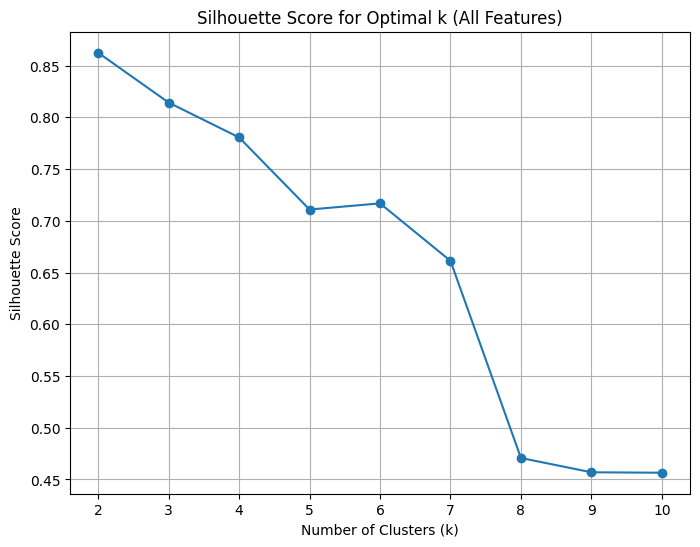

In [50]:
from sklearn.metrics import silhouette_score

#k values from 2 to 10 (silhouette score isn't defined for k=1)
silhouette_scores = []

#k values from 2 to 10 to avoid k = 1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    
    #Calculate silhouette score
    if len(set(kmeans.labels_)) > 1:  
        score = silhouette_score(data_normalized, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

#Silhouette scores 
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k (All Features)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


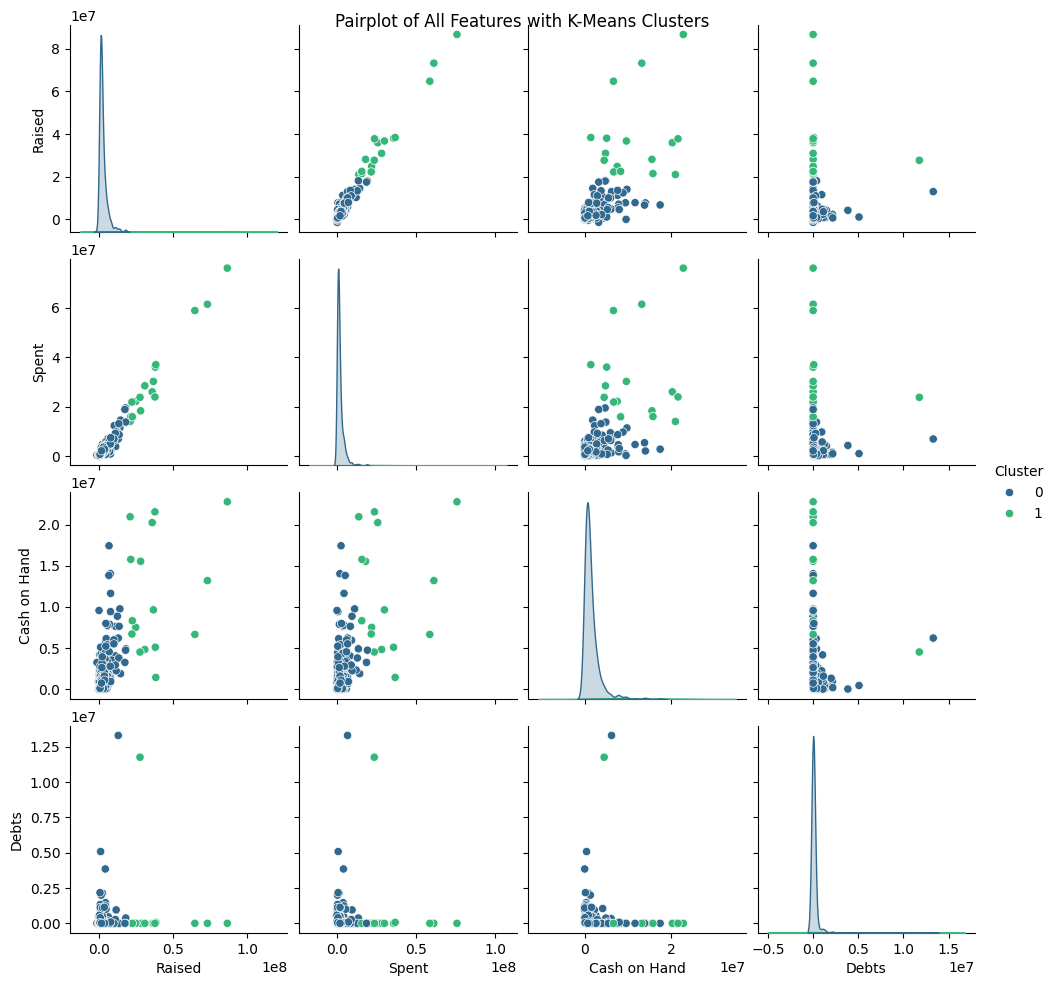

In [52]:
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
data['Cluster_all_features'] = kmeans_optimal.fit_predict(data_normalized)

import seaborn as sns
sns.pairplot(data[['Raised', 'Spent', 'Cash on Hand', 'Debts']].assign(Cluster=data['Cluster_all_features']), 
             hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of All Features with K-Means Clusters')
plt.show()

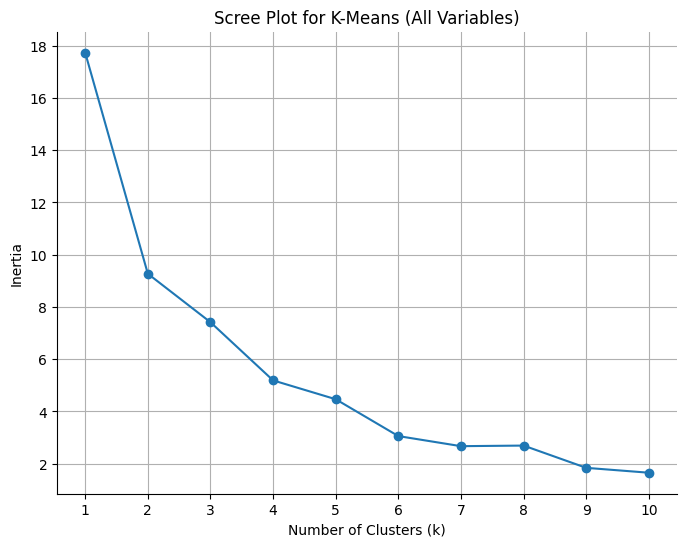

In [70]:
from sklearn.preprocessing import MinMaxScaler

#Normalize the relevant columns
scaler = MinMaxScaler()
data[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = scaler.fit_transform(data[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

X_all = data[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

#Optimal number of clusters
inertia = []  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_all)
    inertia.append(kmeans.inertia_)

#Scree plot (Elbow method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for K-Means (All Variables)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

     Raised     Spent  Cash on Hand  Debts  Cluster
0  0.103512  0.098074      0.040154    0.0        0
1  0.040686  0.016371      0.111166    0.0        0
2  0.254404  0.183753      0.920268    0.0        1
3  0.029527  0.015449      0.030150    0.0        0
4  0.034148  0.021915      0.050962    0.0        0


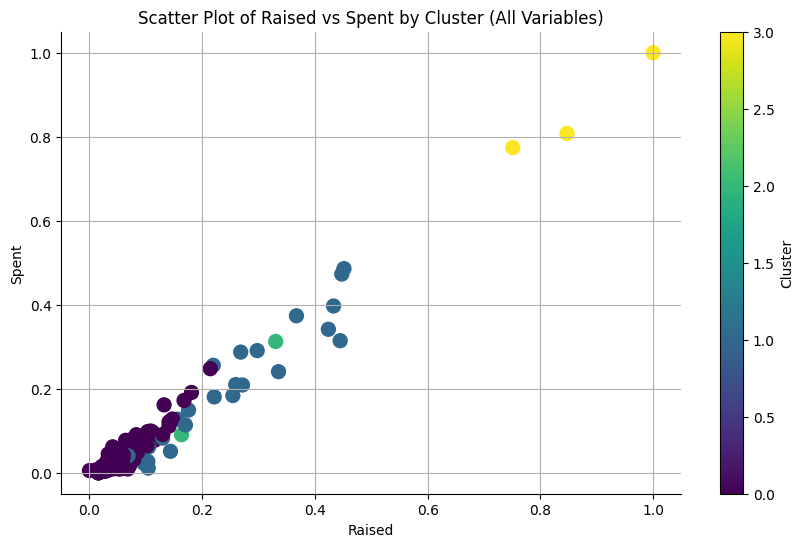

Smallest two clusters: Cluster
2    2
3    3
Name: count, dtype: int64
Politicians in the smallest two clusters: 133        David Trone
340         Mark Kelly
417    Raphael Warnock
442        Ron Johnson
523        Val Demings
Name: Member, dtype: object


In [ ]:
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X_all)

print(data[['Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster']].head())
plt.figure(figsize=(10, 6))
plt.scatter(data['Raised'], data['Spent'], c=data['Cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Raised vs Spent by Cluster (All Variables)')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#Smallest Clusters
cluster_sizes = data['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2)
print('Smallest two clusters:', smallest_clusters)

#Politicians
smallest_cluster_ids = smallest_clusters.index
smallest_cluster_politicians = data[data['Cluster'].isin(smallest_cluster_ids)]
print("Politicians in the smallest two clusters:", smallest_cluster_politicians['Member'])

The smallest clusters are 2 and 3 now and have less members total: 5 as opposed to 21. This is pretty good analysis for this level of work. smallest clusters were 2 and 1, 3 and 1, and with all four: 2 and 3, which is one cluster from each set of variables.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
q4 = pd.read_csv('./airbnb_hw.csv')

In [4]:
q4.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [6]:
q4['Price'].value_counts()

Price
150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: count, Length: 511, dtype: int64

In [7]:
q4['Price'] = q4['Price'].astype(str).str.replace(r'[,]', '', regex=True).astype(float)


In [13]:
Q1 = q4['Price'].quantile(0.25)
Q3 = q4['Price'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
q4 = q4[(q4['Price'] >= lower_bound) & (q4['Price'] <= upper_bound)]

In [14]:
q4['Price'].value_counts()

Price
150.0    1481
100.0    1207
200.0    1059
125.0     889
75.0      873
         ... 
263.0       1
327.0       1
343.0       1
311.0       1
291.0       1
Name: count, Length: 317, dtype: int64

<Axes: >

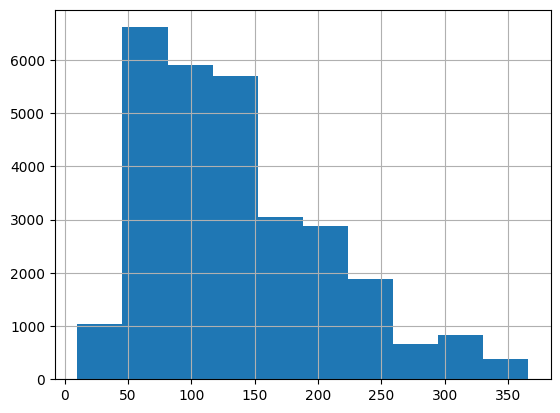

In [15]:
q4['Price'].hist()

In [16]:
q4['Beds'].value_counts()

Beds
1.0     20057
2.0      6144
3.0      1740
4.0       575
5.0       186
6.0       118
7.0        28
8.0        14
10.0        7
16.0        5
12.0        3
11.0        3
0.0         2
9.0         2
Name: count, dtype: int64

In [18]:
q4 = q4[~q4['Beds'].isin([0.0, 9.0, 10.0, 11.0, 12.0, 16.0])] 
q4 = q4.dropna(subset=['Beds'])

<Axes: >

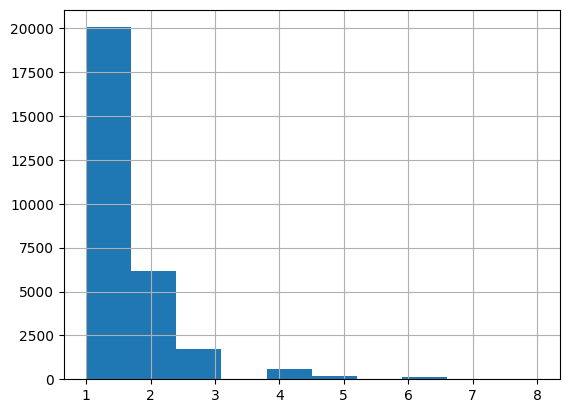

In [19]:
q4['Beds'].hist()

In [20]:
q4['Number Of Reviews'].value_counts()

Number Of Reviews
0      7156
1      3432
2      2348
3      1676
4      1328
       ... 
170       1
213       1
178       1
153       1
130       1
Name: count, Length: 205, dtype: int64

In [21]:
Q1 = q4['Number Of Reviews'].quantile(0.25)
Q3 = q4['Number Of Reviews'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
q4 = q4[(q4['Number Of Reviews'] >= lower_bound) & (q4['Number Of Reviews'] <= upper_bound)]

<Axes: >

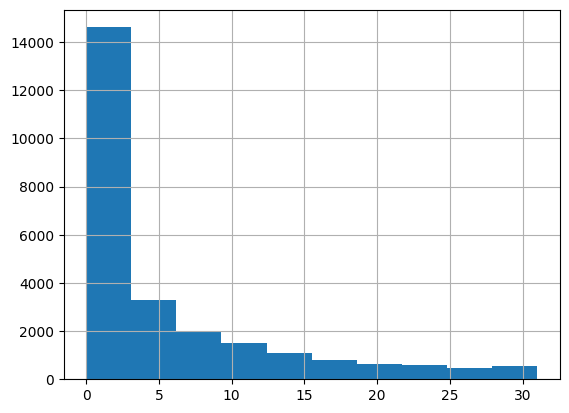

In [22]:
q4['Number Of Reviews'].hist()

In [23]:
q4['Review Scores Rating'].value_counts()

Review Scores Rating
100.0    5306
90.0     1442
80.0     1351
93.0     1281
95.0      930
96.0      872
97.0      769
98.0      626
94.0      588
92.0      571
87.0      562
91.0      514
88.0      425
89.0      351
85.0      274
60.0      238
99.0      219
86.0      215
84.0      214
83.0      204
70.0      122
82.0       93
73.0       82
77.0       69
78.0       66
76.0       64
75.0       50
40.0       45
81.0       41
67.0       39
20.0       39
72.0       30
79.0       25
74.0       20
65.0       20
71.0       19
50.0       18
68.0       15
69.0       10
53.0        8
63.0        5
62.0        4
47.0        3
66.0        3
64.0        3
57.0        2
55.0        2
43.0        2
30.0        2
58.0        1
49.0        1
Name: count, dtype: int64

In [25]:
Q1 = q4['Review Scores Rating'].quantile(0.25)
Q3 = q4['Review Scores Rating'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
q4 = q4[(q4['Review Scores Rating'] >= lower_bound) & (q4['Review Scores Rating'] <= upper_bound)]

<Axes: >

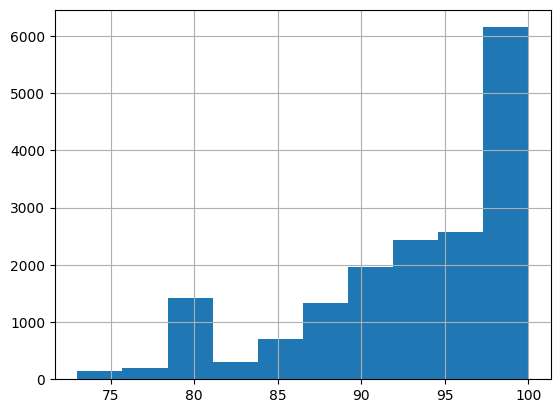

In [26]:
q4['Review Scores Rating'].hist()

In [27]:
q4 = q4.dropna()

In [28]:
from sklearn.cluster import KMeans

In [32]:
print(q4.columns) 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


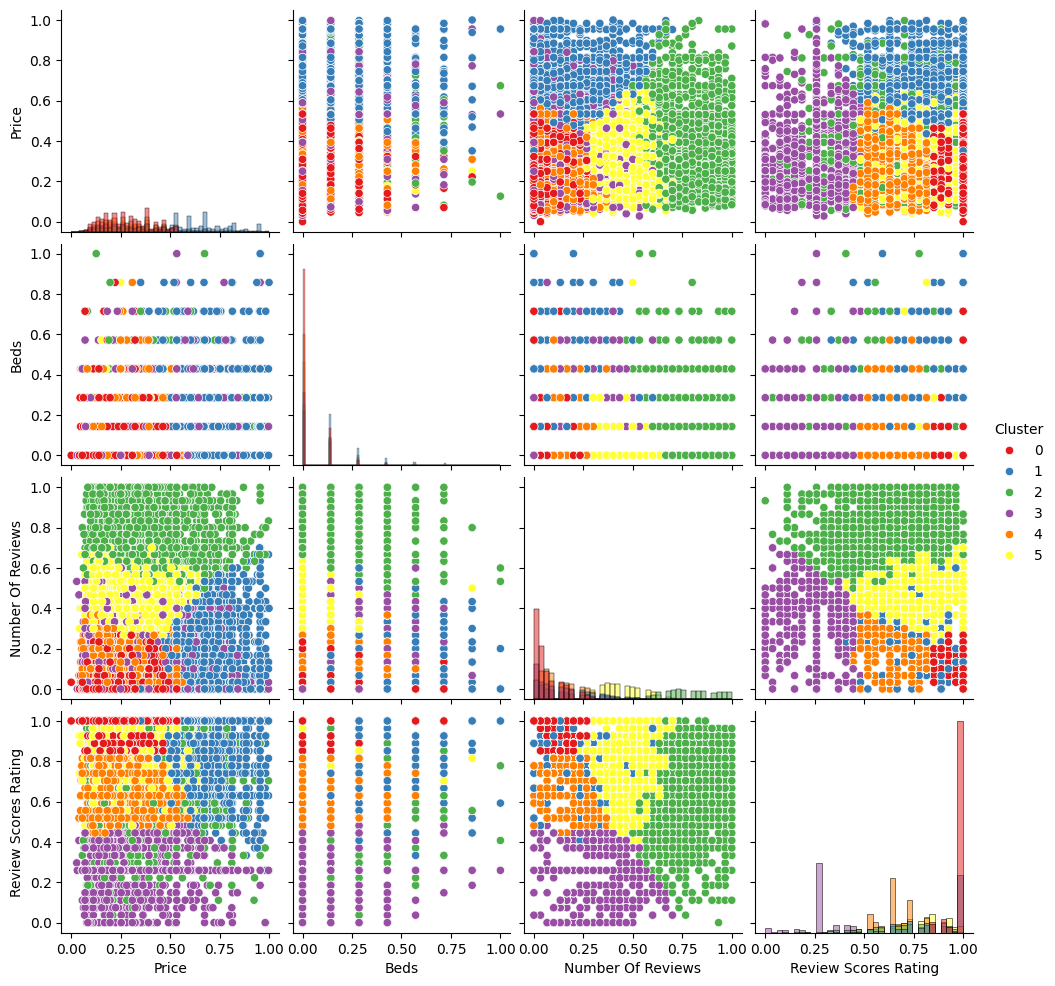

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Select the relevant features for clustering
X = q4[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]  # Select columns for clustering

# Step 2: Normalize the data (optional, but recommended for KMeans)
X_scaled = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))  # Min-Max normalization

# Step 3: Apply KMeans clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
X_scaled['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Create a pairplot using Seaborn to visualize the clusters
sns.pairplot(X_scaled, hue="Cluster", palette="Set1", diag_kind="hist")

# Show the plot
plt.show()


In [52]:
cluster_avg_price = X_scaled.groupby('Cluster')['Price'].describe()

# Display the average price for each cluster
print(cluster_avg_price)

          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        4618.0  0.280791  0.119332  0.000000  0.182584  0.261236  0.387640   
1        2623.0  0.667097  0.134367  0.351124  0.547753  0.660112  0.758427   
2        1992.0  0.383959  0.190061  0.056180  0.228933  0.365169  0.507022   
3        2173.0  0.319763  0.181416  0.028090  0.182584  0.280899  0.421348   
4        3222.0  0.278791  0.120182  0.039326  0.182584  0.252809  0.379213   
5        2534.0  0.315884  0.134718  0.042135  0.207865  0.308989  0.421348   

              max  
Cluster            
0        0.547753  
1        1.000000  
2        0.997191  
3        0.997191  
4        0.603933  
5        0.679775  


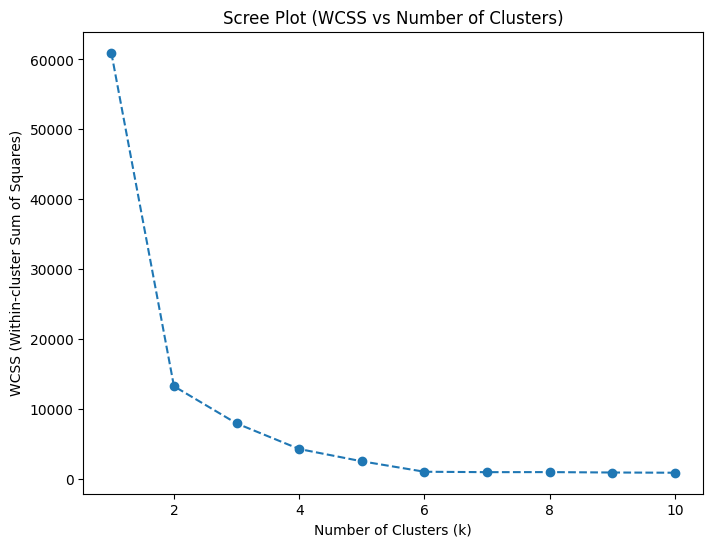

In [53]:
wcss = []
for k in range(1, 11):  # Calculate for k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Scree Plot (WCSS vs Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

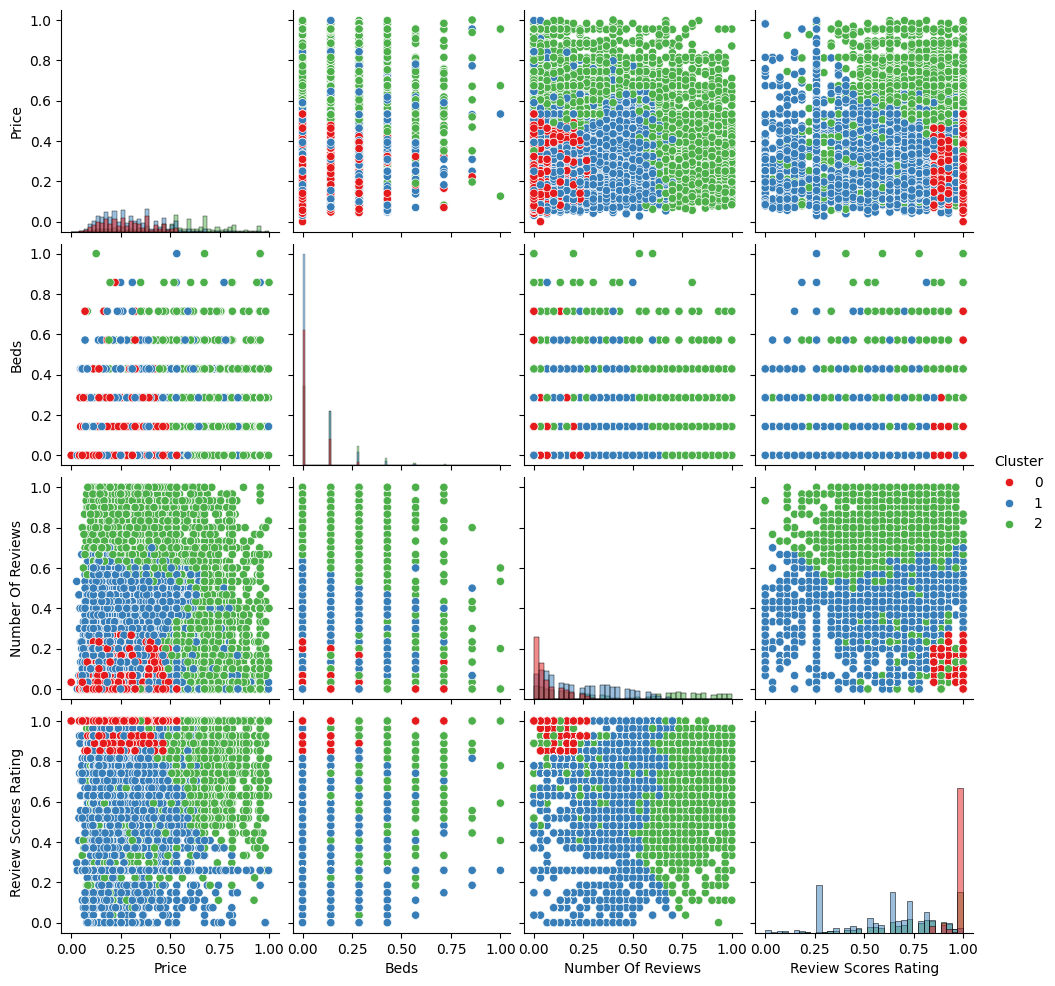

Clusters with the highest rental prices:
             mean
Cluster          
2        0.544884
1        0.301874
0        0.280791


In [54]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X_scaled['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a pairplot again
sns.pairplot(X_scaled, hue="Cluster", palette="Set1", diag_kind="hist")
plt.show()

# Compute the average price for each cluster using .groupby and .describe()
cluster_avg_price = X_scaled.groupby('Cluster')['Price'].describe()

# Sort by mean price and display the clusters with the highest rental prices
highest_price_clusters = cluster_avg_price.sort_values('mean', ascending=False)
print("Clusters with the highest rental prices:")
print(highest_price_clusters[['mean']])


**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?